In [1]:
import os
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt


def ProcessAverageStructureNumber(agents_size):
    folder_path = 'data/size-'+ str(agents_size)
    file_names = [file for file in os.listdir(folder_path) if file.startswith('STRUCT')]
    totalTime_sec = 300

    #from all  the files that can be open using the collection 'file names', 
    #group the data of every file by 'time', then get the count for every group from a file, 
    #then, average the count of all files per a period of time of 1 second

    timed_dic = {} # One element per second range
    for sec in range(1, totalTime_sec + 1):
        timed_dic[sec] = []

    for file_name in file_names:
        file_structs_path = os.path.join(folder_path, file_name)
        df = pd.read_csv(file_structs_path)
        grouped_data_time_count = df.groupby('time').size().reset_index(name='count')
        last_count = agents_size
        for sec in range(1, totalTime_sec + 1):
            for index, row in grouped_data_time_count.iterrows():
                if row['time'] > sec:
                    break
                if row['time'] > sec - 1 and row['time'] <= sec:
                    last_count = row['count']
                    timed_dic[sec].append(last_count)  
            if len(timed_dic[sec]) == 0:
                timed_dic[sec].append(last_count)
        #break

    averages = [[np.mean(values), np.std(values)] for x, values in timed_dic.items()]
    return averages


def PlotAverageStructureNumber(agents_size, averages, save_file = False):
    # Extract the average and standard deviation values from the 'averages' list
    average_values = [item[0] for item in averages]
    std_values = [item[1] for item in averages]

    # Create a list of x-coordinates for the data points
    x = list(range(len(average_values)))

    # Plot the average values with error bars
    plt.errorbar(x, average_values, yerr=std_values, fmt='o', color = 'b', ecolor='orange', elinewidth=0.7, capsize=3, markersize=3)

    # Set the labels for the x-axis and y-axis
    plt.xlabel('Time (s)')
    plt.ylabel('Average Number of Structures')

    # Set the title of the graph
    title = 'Number of Structures Over Time ('+str(agents_size)+' Agents)'
    plt.title(title)

    # Join points with a line
    plt.plot(x, average_values, '-', color = 'b')

    if save_file:
        # Save the graph to a file
        filepath = 'figures/'
        plt.savefig(filepath + title + '.pdf', bbox_inches='tight')

     # Display the graph
    plt.show()
    


In [2]:
import os

default_path = r'C:\Users\pitte\Documents\Repositories\self_assembly_music\data_analysis'
os.chdir(default_path)


In [139]:
averages = ProcessAverageStructureNumber(50)

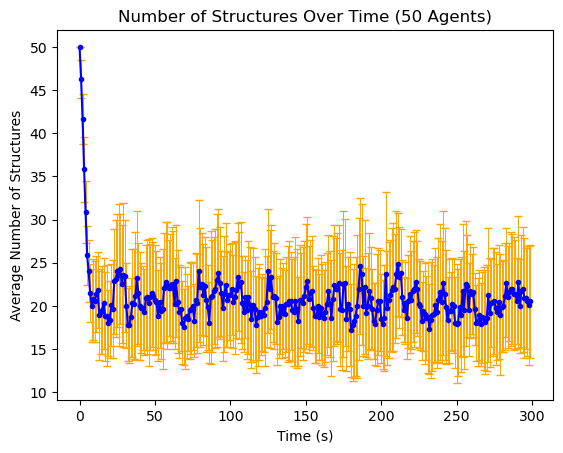

In [146]:
agents_size = 50
PlotAverageStructureNumber(agents_size, averages, save_file = True)

In [15]:

def PlotNumberAndSizeFromOneSet(file_structs_path, save_file = False, font_size_title = 12, font_size = 12):
    #file_structs_path = 'data/size-5/STRUCT-2024_04_28_13_50_19-N-5-minspeed-1-maxspeed-1-maxjointtime-5-joinradiusfactor-2-maxjointssize-6-radiusboundary-2-freq-1.csv'

    start_index = file_structs_path.find("N-") + 2  # Find the index where 'N-' ends
    end_index = file_structs_path.find("-ls")  # Find the index where '-file' starts
    agents_size = int(file_structs_path[start_index:end_index])  # Extract the substring between 'N-' and '-file'

    #extract maxjointtime from the file name
    start_index = file_structs_path.find("jt-") + 3  # Find the index where 'maxjointtime-' ends
    end_index = file_structs_path.find("-jr")  # Find the index where '-joinradiusfactor' starts
    maxjointtime = float(file_structs_path[start_index:end_index])  # Extract the substring between 'maxjointtime-' and '-joinradiusfactor'

    # Read the data from file_structs_path into a DataFrame
    df = pd.read_csv(file_structs_path)

    # Group the data by time and get the count of each group
    grouped_data_time = df.groupby('time').size().reset_index(name='count')
    grouped_data_time['count'] = grouped_data_time['count'] / agents_size

    # Plot the data
    plt.figure(figsize=(15, 4))
    plt.plot(grouped_data_time['time'], grouped_data_time['count'], color = 'b')


    # Group the data by time and get the count of each group
    #grouped_data_time = df.groupby('time')

    df['N_normalized'] = df['N'] / agents_size

    s = [3 for n in range(len(df['time']))]

    #plt.figure(figsize=(15, 5))
    plt.scatter(df['time'], df['N_normalized'], s=s, color='red')

    plt.ylim(0, 1)
    plt.xlabel('time')
    plt.ylabel('N')
    plt.title('N vs time')
    #plt.show()


    # Step 1: Group the DataFrame by 'time'
    grouped_df = df.groupby('time')

    # Step 2: Get the maximum 'N' value per group
    max_N_per_group = grouped_df['N'].max()

    # Step 3: Normalize the maximum 'N' values by dividing by agents_size
    normalized_N = max_N_per_group / agents_size

    # Step 4: Plot vertical lines for each unique 'time' value
    for time, norm_N in normalized_N.items():
        plt.axvline(x=time, color='orange', linestyle='-', linewidth=1, alpha=0.25, ymax=norm_N)

    # Add labels and title to the plot
    plt.xlabel('Time (s)', fontsize=font_size)
    plt.ylabel('Normalized Value', fontsize=font_size)
    #title = 'Normalized Number and Sizes of Structures Over Time ('+str(agents_size)+' Agents, Join Time = '+str(maxjointtime)+'s)'
    title = '('+str(agents_size)+' Agents, Join Time = '+str(maxjointtime)+'s)'
    plt.title(title, fontsize=font_size_title)

    plt.legend(['Number of Structures', 'Sizes of Structures'])

    if save_file:
            # Save the graph to a file
            filepath = 'figures/'
            file_title = title.replace(' ', '_').replace('=', '-')
            plt.savefig(filepath + file_title + '.pdf', bbox_inches='tight')

    # Show the plot
    plt.show()

def PlotNumberFromSet(file_structs_path):
    start_index = file_structs_path.find("N-") + 2  # Find the index where 'N-' ends
    end_index = file_structs_path.find("-ls")  # Find the index where '-file' starts
    agents_size = int(file_structs_path[start_index:end_index])  # Extract the substring between 'N-' and '-file'

    #extract maxjointtime from the file name
    start_index = file_structs_path.find("jt-") + 3  # Find the index where 'maxjointtime-' ends
    end_index = file_structs_path.find("-jr")  # Find the index where '-joinradiusfactor' starts
    maxjointtime = float(file_structs_path[start_index:end_index])  # Extract the substring between 'maxjointtime-' and '-joinradiusfactor'

    # Read the data from file_structs_path into a DataFrame
    df = pd.read_csv(file_structs_path)

    # Group the data by time and get the count of each group
    grouped_data_time = df.groupby('time').size().reset_index(name='count')
    grouped_data_time['count'] = grouped_data_time['count'] / agents_size

    # Plot the data
    plt.plot(grouped_data_time['time'], grouped_data_time['count'])
    




In [4]:
import sys
import os

def PlotSyncError(all_mean_differences):
    
    min_len = sys.maxsize
    for mean_differences in all_mean_differences:
        plt.plot(mean_differences)
        len_means = len(mean_differences)
        if len_means < min_len:
            min_len = len_means    

    plt.show()
    # final_mean_differences = np.zeros(min_len)
    # for mean_differences in all_mean_differences:
    #     final_mean_differences += mean_differences[:min_len]
    # final_mean_differences /= len(all_mean_differences)        
    # plt.plot(final_mean_differences)
    # plt.show()

def GetApproximateSyncTime(sync_errors):
    times = []
    threshold = 0.01 * 2 # twice deltatime
    agents_size = len(sync_errors)
    for t in range(0, 300):    
        counter = 0
        for sync_error_agent in sync_errors:
            if t < len(sync_error_agent) and sync_error_agent[t] <= threshold:
                counter += 1
            else:
                break
        if counter == agents_size:
            #print("All agents are synchronized at time: " + str(t))
            return t
        times.append(t)
    print("Threshold is too low, not all agents are synchronized: " + str(len(sync_errors)))
    return -1
        


import pickle
import statistics

def ProcessDiffSyncError(agents_size):
    folder_path = 'data/sync_struct_5_100/size-'+ str(agents_size)+'-join-5'
    file_names = [file for file in os.listdir(folder_path) if file.startswith('DIFF-SYNC')]

    # Specify the file path
    #file_path = "data/size-50/DIFF-SYNC-2024_04_28_14_11_58-N-50-minspeed-1-maxspeed-1-maxjointtime-5-joinradiusfactor-2-maxjointssize-6-radiusboundary-2-freq-1.pkl"
    sync_errors_agent = []
    unsync_runs = 0
    for file_name in file_names:
        file_path = os.path.join(folder_path, file_name)
        with open(file_path, "rb") as file:
            sync_errors = pickle.load(file)
            #PlotSyncError(sync_errors)
            syncTime = GetApproximateSyncTime(sync_errors)
            if syncTime < 0:
                unsync_runs += 1
            else:
                sync_errors_agent.append(syncTime)
    return sync_errors_agent, unsync_runs




# # Calculate descriptive statistics
# mean = statistics.mean(sync_errors_agent)
# median = statistics.median(sync_errors_agent)
# mode = statistics.mode(sync_errors_agent)
# stdev = statistics.stdev(sync_errors_agent)
# variance = statistics.variance(sync_errors_agent)

# # Print the results
# print("Mean:", mean)
# print("Median:", median)
# print("Mode:", mode)
# print("Standard Deviation:", stdev)
# print("Variance:", variance)


# x = list(range(len(sync_errors_agent)))
# plt.plot(x, sync_errors_agent)


# Print the retrieved array
#PlotSyncError(sync_errors)
# for sync_error in sync_errors:
#     print(sync_error)
# np.array(sync_errors[0]).max()


In [5]:
agents_size_array = [5, 10, 20, 30, 40, 50, 60, 70, 80, 90, 100]
all_sync_errors = []
all_unsync_runs = []
for agents_size in agents_size_array:
    sync_errors_agent, unsync_runs = ProcessDiffSyncError(agents_size)
    all_sync_errors.append(sync_errors_agent)
    all_unsync_runs.append(unsync_runs)

Threshold is too low, not all agents are synchronized: 5
Threshold is too low, not all agents are synchronized: 10
Threshold is too low, not all agents are synchronized: 10
Threshold is too low, not all agents are synchronized: 10
Threshold is too low, not all agents are synchronized: 20
Threshold is too low, not all agents are synchronized: 20
Threshold is too low, not all agents are synchronized: 30


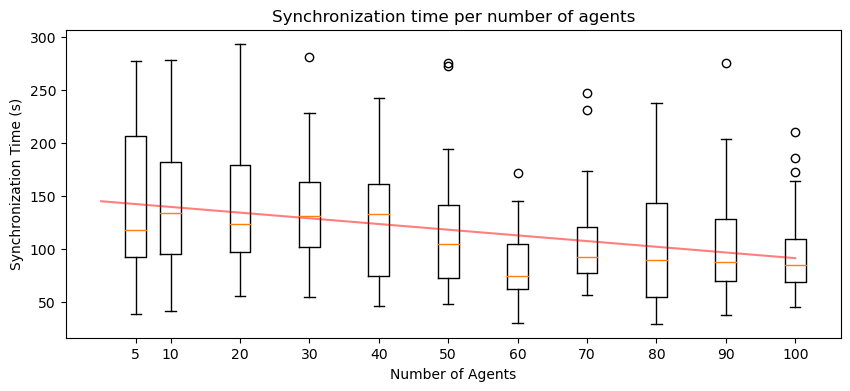

                            OLS Regression Results                            
Dep. Variable:            Sync Errors   R-squared:                       0.084
Model:                            OLS   Adj. R-squared:                  0.081
Method:                 Least Squares   F-statistic:                     29.45
Date:                Wed, 15 May 2024   Prob (F-statistic):           1.13e-07
Time:                        13:45:40   Log-Likelihood:                -1751.3
No. Observations:                 323   AIC:                             3507.
Df Residuals:                     321   BIC:                             3514.
Df Model:                           1                                         
Covariance Type:            nonrobust                                         
                 coef    std err          t      P>|t|      [0.025      0.975]
------------------------------------------------------------------------------
const        144.9248      5.933     24.425      0.0

In [52]:
import matplotlib.pyplot as plt
import statsmodels.api as sm

def plot_all_sync_errors(all_sync_errors):
    # Create a list of data for each group in agents_size_array
    data = [all_sync_errors[i] for i in range(len(agents_size_array))]

    ### LINEAR REGRESSION
    
    # Create an empty DataFrame
    data_sync = pd.DataFrame()

    # Iterate over each collection in all_sync_errors
    for i, collection in enumerate(all_sync_errors):
        # Get the corresponding agent size from agents_size_array
        agent_size = agents_size_array[i]
        
        # Create a new DataFrame with the collection data
        df = pd.DataFrame(collection, columns=['Sync Errors'])
        
        # Add a new column for the agent size
        df['Agent Size'] = agent_size
        
        # Append the new DataFrame to the main dataset
        data_sync = pd.concat([data_sync, df], ignore_index=True)

    # Fit the linear regression model
    X = data_sync['Agent Size']
    y = data_sync['Sync Errors']
    X = sm.add_constant(X)  # Add a constant term to the predictor variable
    linear_model_sync = sm.OLS(y, X).fit()


    # Create a figure and axis
    fig, ax = plt.subplots(figsize=(10, 4))    

    # Create a boxplot
    ax.boxplot(data, positions=agents_size_array, widths=3)

    # Set the x-axis labels
    ax.set_xticklabels(agents_size_array)

    #plt.plot(X['Agent Size'], linear_model_sync.predict(X), color='red')

    # Set the x-axis label
    ax.set_xlabel('Number of Agents')

    # Set the y-axis label
    ax.set_ylabel('Synchronization Time (s)')

    title = 'Synchronization time per number of agents'
    # Set the title
    ax.set_title(title)

    # Plot linear_model_sync line
    x = np.linspace(0, 100, 100)
    y = linear_model_sync.params[0] + linear_model_sync.params[1] * x
    plt.plot(x, y, color='red', alpha=0.5)

    plt.savefig('figures/' + title + '.pdf', bbox_inches='tight')

    # Show the plot
    plt.show()

    # Print the summary of the linear regression model
    print(linear_model_sync.summary())

    # Print teh exact values of p values 
    print(linear_model_sync.pvalues)

plot_all_sync_errors(all_sync_errors)


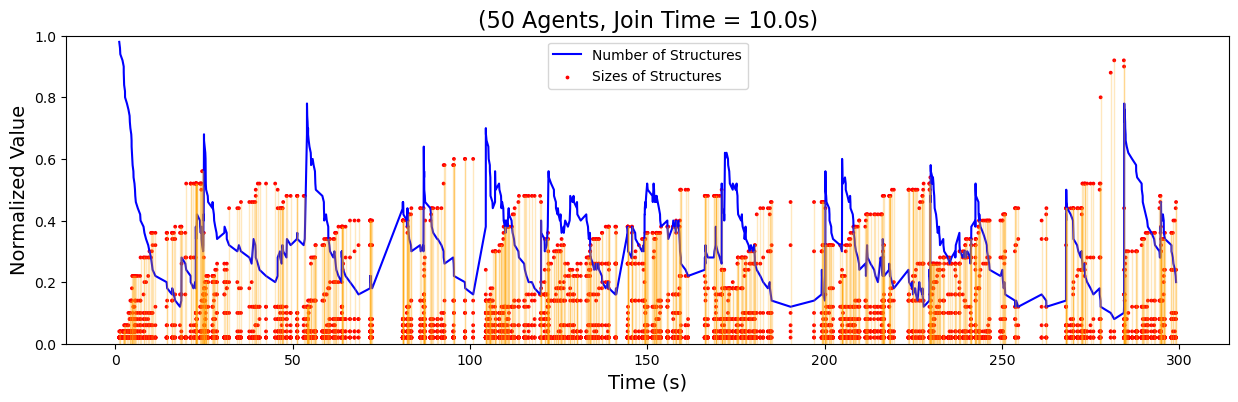

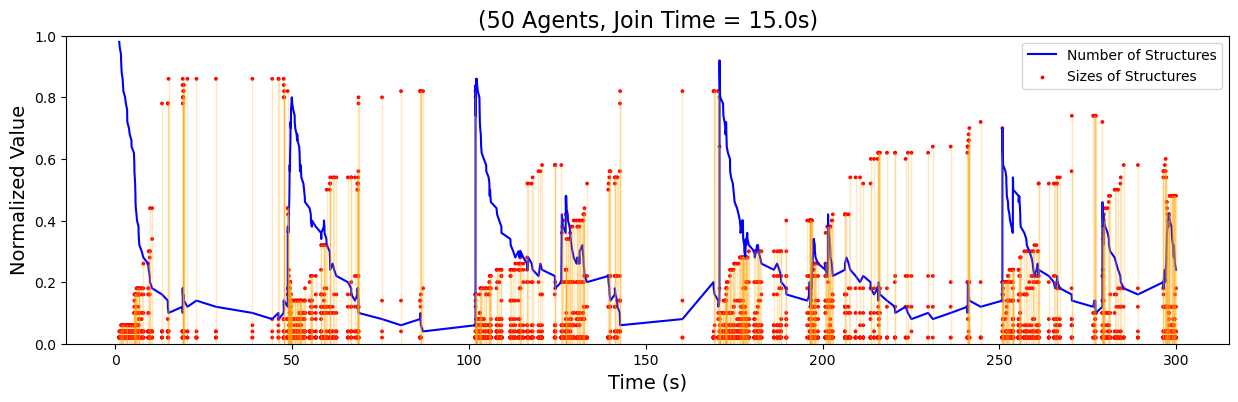

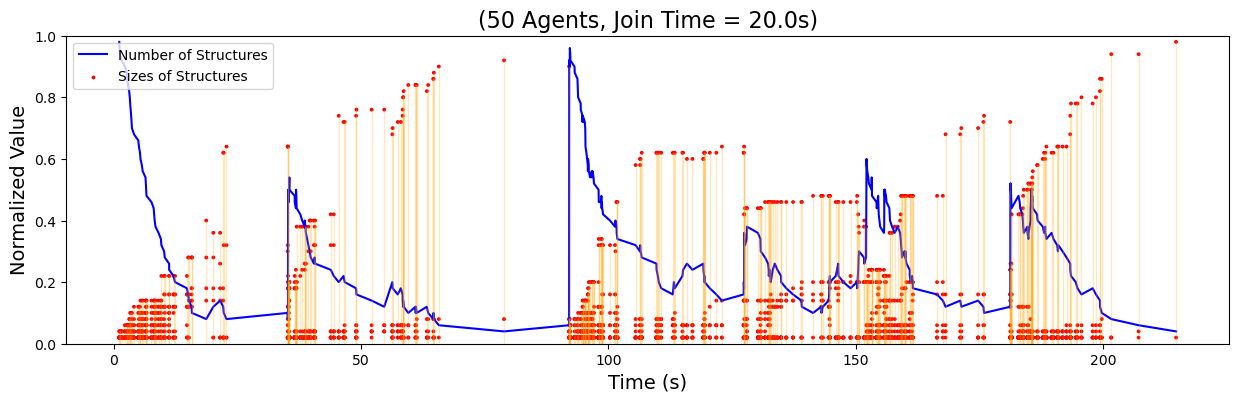

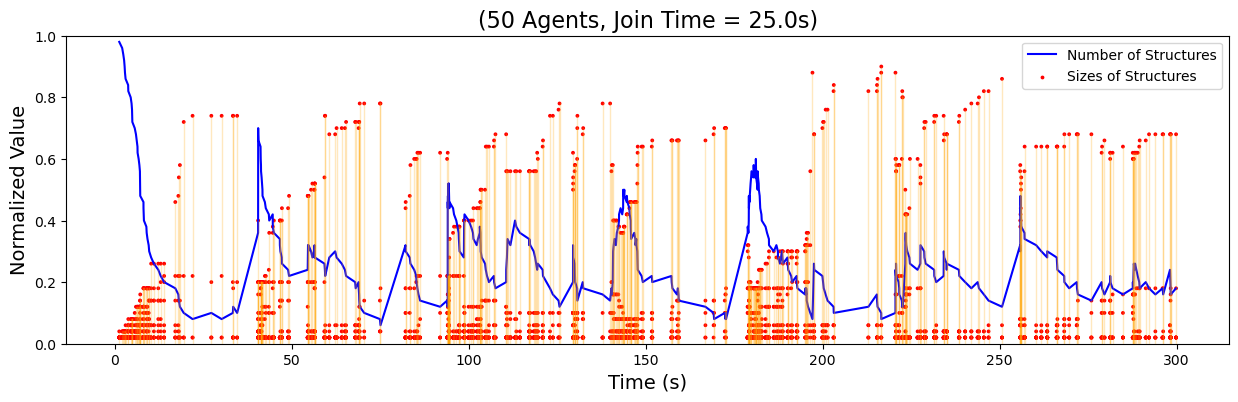

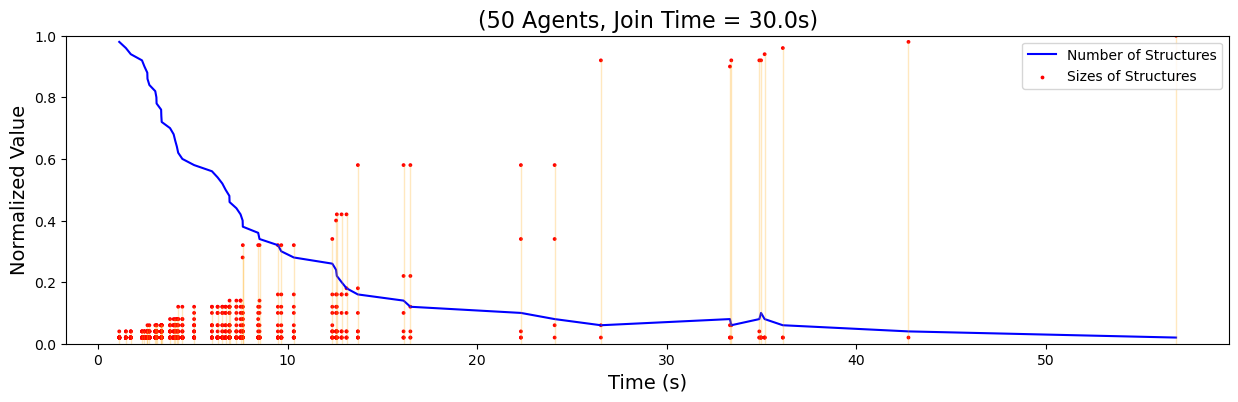

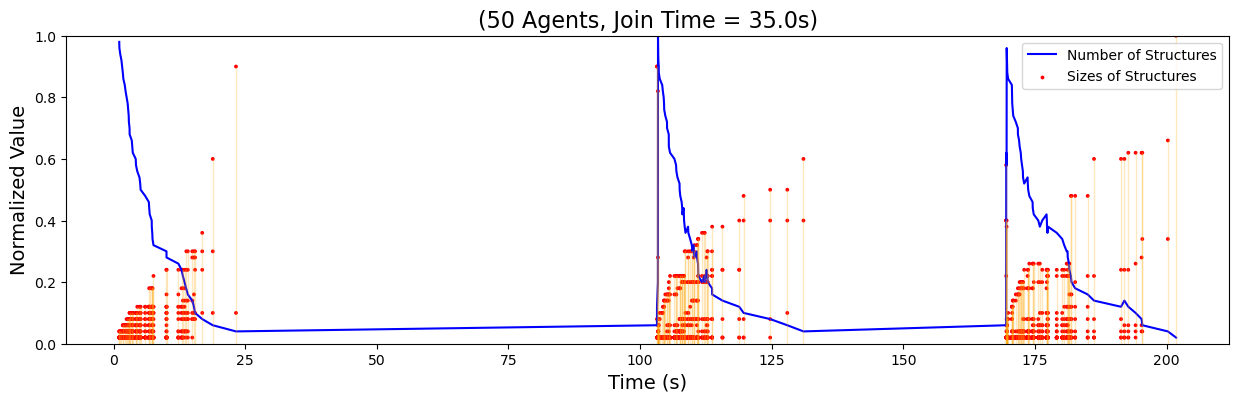

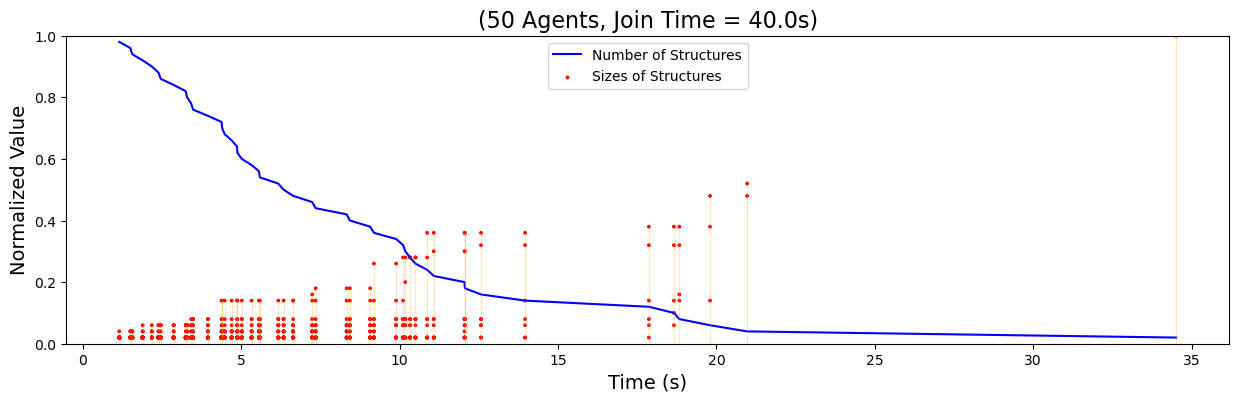

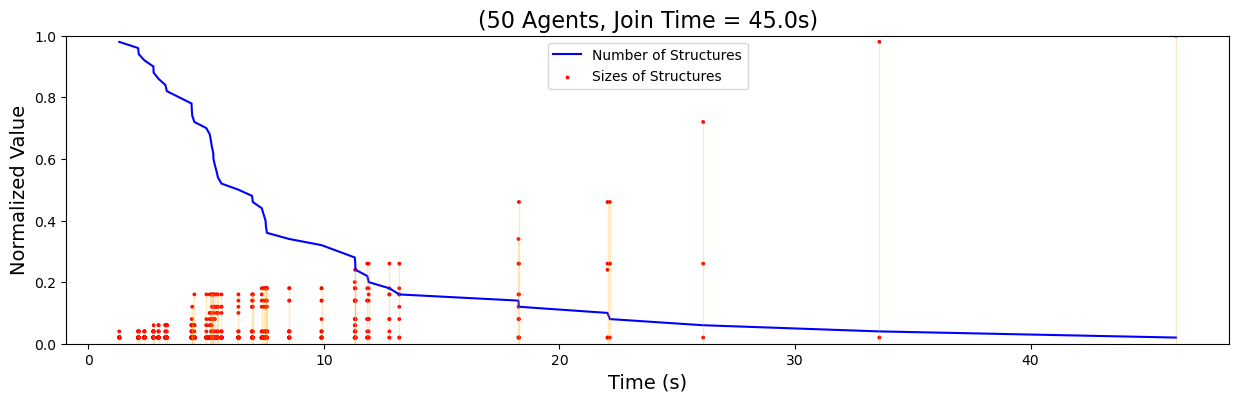

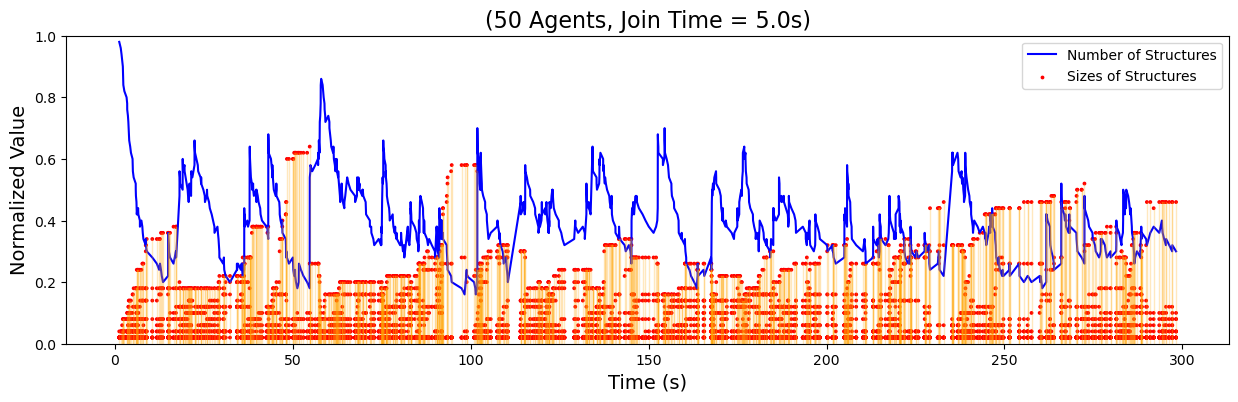

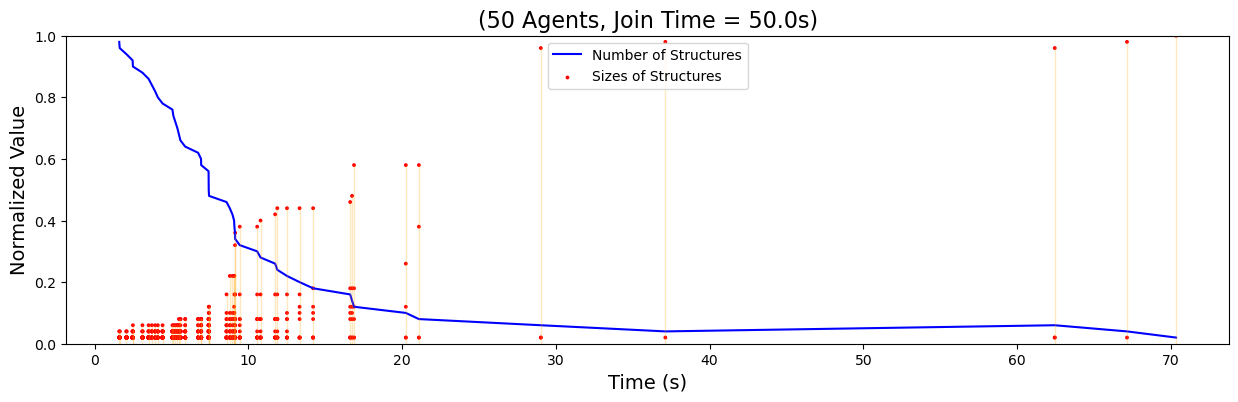

In [16]:
import os

parent_folder = 'data/sync_struct_50_join_5_50/'

# Get a list of all folders starting with 'size-50-join'
folders = [folder for folder in os.listdir(parent_folder) if folder.startswith('size-50-join')]

jointime_paths = []
# Iterate over the folders and find files starting with 'STRUCT'
for folder in folders:
    folder_path = os.path.join(parent_folder, folder)
    files = [file for file in os.listdir(folder_path) if file.startswith('STRUCT')]
    for file in files:
        jointime_paths.append(os.path.join(folder_path, file))


for jointime_path in jointime_paths:
    PlotNumberAndSizeFromOneSet(jointime_path, save_file = True, font_size_title=16, font_size = 14)
#PlotNumberFromSet('data/size-50-join-10/STRUCT-2024_04_29_16_28_29-N-50-minspeed-1-maxspeed-1-maxjointtime-10-joinradiusfactor-2-maxjointssize-6-radiusboundary-2-freq-1.csv')

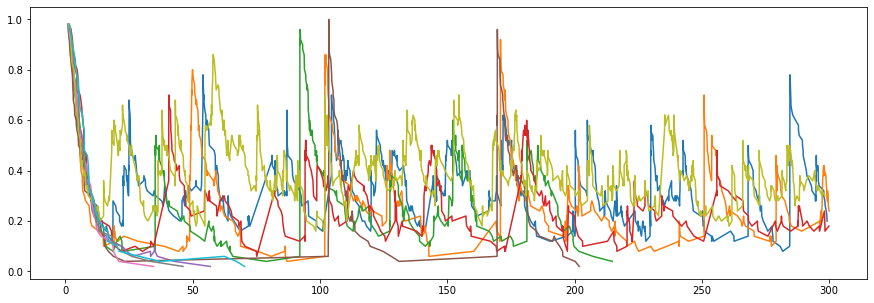

In [11]:
plt.figure(figsize=(15, 5))
for jointime_path in jointime_paths:
    PlotNumberFromSet(jointime_path)
plt.show()